In [ ]:
#import the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#Look at the data types of the variable
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#get the shape of arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Take a look at first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

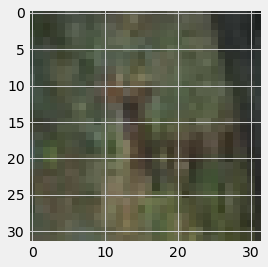

In [ ]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
#Get the image label
print('the image label is:', y_train[index])

the image label is: [4]


In [ ]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [ ]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new labels of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normilize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

In [ ]:
#Create the model architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flatting layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 59s 374ms/step - loss: 0.7730 - accuracy: 0.7267 - val_loss: 0.9206 - val_accuracy: 0.6848
Epoch 2/10
157/157 [==============================] - 59s 375ms/step - loss: 0.7256 - accuracy: 0.7431 - val_loss: 0.9671 - val_accuracy: 0.6705
Epoch 3/10
157/157 [==============================] - 59s 374ms/step - loss: 0.6876 - accuracy: 0.7581 - val_loss: 0.9449 - val_accuracy: 0.6789
Epoch 4/10
157/157 [==============================] - 59s 374ms/step - loss: 0.6542 - accuracy: 0.7701 - val_loss: 0.9141 - val_accuracy: 0.6883
Epoch 5/10
157/157 [==============================] - 58s 373ms/step - loss: 0.6308 - accuracy: 0.7764 - val_loss: 0.9214 - val_accuracy: 0.6914
Epoch 6/10
157/157 [==============================] - 59s 373ms/step - loss: 0.5773 - accuracy: 0.7936 - val_loss: 0.9255 - val_accuracy: 0.6932
Epoch 7/10
157/157 [==============================] - 58s 373ms/step - loss: 0.5338 - accuracy: 0.8118 - val_loss: 0.9351 - val_ac

In [ ]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9912 - accuracy: 0.6837


0.6837000250816345

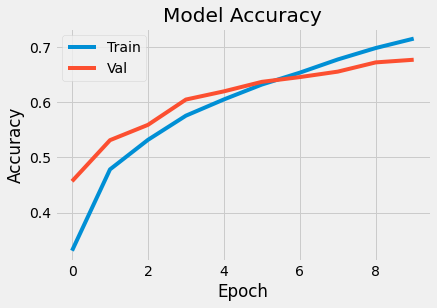

In [ ]:
#visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

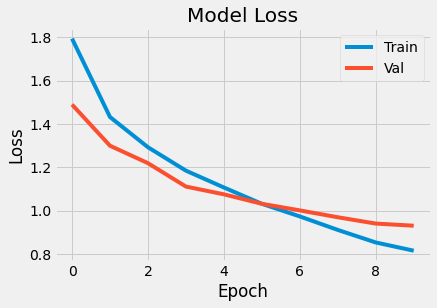

In [ ]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


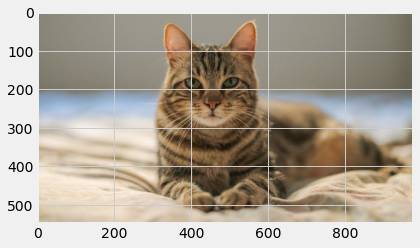

In [ ]:
#show the image
new_image =plt.imread('cat.jpg')
img = plt.imshow(new_image)

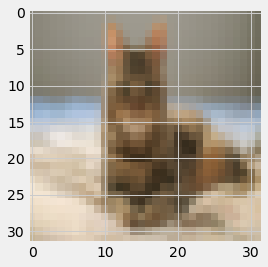

In [ ]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#Get the models prediction
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[2.25697714e-03, 2.47449381e-04, 2.20437557e-01, 2.93178976e-01,
        1.11275636e-01, 2.00845137e-01, 1.47122502e-01, 1.05756214e-02,
        1.31867519e-02, 8.73457466e-04]], dtype=float32)

In [ ]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[3, 2, 5, 6, 4, 8, 7, 0, 9, 1]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 29.32 %
bird : 22.04 %
dog : 20.08 %
frog : 14.71 %
deer : 11.13 %
